<a href="https://colab.research.google.com/github/Thujaina/NIT-Internship/blob/main/brier_score_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install imblearn

In [2]:
!pip install seaborn

In [3]:
!pip install -U tensorflow scikeras imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is inc

In [4]:
!pip install scikeras

In [5]:
!pip install -U scikit-learn scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 34.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, accuracy_score, f1_score

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")


In [7]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [8]:
TRAIN_PATH = "/content/drive/MyDrive/datasets/ECG/mitbih_train.csv"
TEST_PATH  = "/content/drive/MyDrive/datasets/ECG/mitbih_test.csv"

train = pd.read_csv(TRAIN_PATH, header=None)
test  = pd.read_csv(TEST_PATH, header=None)

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (87554, 188)
Test shape: (21892, 188)


In [9]:
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]


In [10]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


In [11]:
y_res_cat  = to_categorical(y_res, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)


In [12]:
X_train, X_val, y_train, y_val = train_test_split(
    X_res, y_res_cat, test_size=0.2, random_state=0
)


In [13]:
def brier_score_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    return tf.reduce_mean(tf.reduce_sum(tf.square(y_pred - y_true), axis=1))


In [14]:
def ann_model():
    model = Sequential([
        Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(64, activation="relu"),
        Dense(5, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss=brier_score_loss,
        metrics=["accuracy"]
    )
    return model


In [15]:
model = ann_model()

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64
)


Epoch 1/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.8476 - loss: 0.2254 - val_accuracy: 0.9371 - val_loss: 0.0971
Epoch 2/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9453 - loss: 0.0865 - val_accuracy: 0.9543 - val_loss: 0.0727
Epoch 3/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9592 - loss: 0.0648 - val_accuracy: 0.9633 - val_loss: 0.0577
Epoch 4/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9680 - loss: 0.0512 - val_accuracy: 0.9650 - val_loss: 0.0552
Epoch 5/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9742 - loss: 0.0419 - val_accuracy: 0.9728 - val_loss: 0.0427
Epoch 6/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9776 - loss: 0.0364 - val_accuracy: 0.9790 - val_loss: 0.0333
Epoch 7/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9801 - loss: 0.0322 - val_accuracy: 0.9821 - val_loss: 0.0291
Epoch 8/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9826 - loss: 0

In [16]:
y_val_pred = np.argmax(model.predict(X_val), axis=1)
y_val_true = np.argmax(y_val, axis=1)

mcc = matthews_corrcoef(y_val_true, y_val_pred)
print("Validation MCC:", mcc)


2265/2265 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step
Validation MCC: 0.9827868918632806


In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9606 - loss: 0.0635
Test Accuracy: 0.9566051363945007
Test Loss: 0.07059136778116226


In [18]:
y_test_pred = np.argmax(model.predict(X_test), axis=1)
y_test_true = np.argmax(y_test_cat, axis=1)

acc = accuracy_score(y_test_true, y_test_pred)
f1  = f1_score(y_test_true, y_test_pred, average="macro")
mcc = matthews_corrcoef(y_test_true, y_test_pred)

print("Accuracy:", acc)
print("F1 Score:", f1)
print("MCC:", mcc)


685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Accuracy: 0.9566051525671478
F1 Score: 0.8234650100582354
MCC: 0.868768122268572


In [19]:
print(
    classification_report(
        y_test_true,
        y_test_pred
    )
)


              precision    recall  f1-score   support

           0       0.99      0.96      0.98     18118
           1       0.52      0.78      0.62       556
           2       0.87      0.95      0.91      1448
           3       0.51      0.83      0.63       162
           4       0.97      0.98      0.98      1608

    accuracy                           0.96     21892
   macro avg       0.77      0.90      0.82     21892
weighted avg       0.97      0.96      0.96     21892



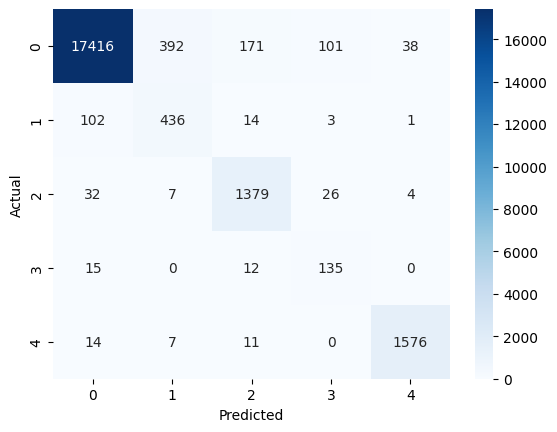

In [20]:
cm = confusion_matrix(y_test_true, y_test_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [21]:
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

acc_scores = []
mcc_scores = []
fold = 1

for train_idx, val_idx in kfold.split(X_res):
    print(f"\n🔁 Fold {fold}")

    X_tr, X_va = X_res.iloc[train_idx], X_res.iloc[val_idx]
    y_tr, y_va = y_res_cat[train_idx], y_res_cat[val_idx]

    model = ann_model()
    model.fit(X_tr, y_tr, epochs=10, batch_size=64, verbose=0)

    val_pred = np.argmax(model.predict(X_va), axis=1)
    val_true = np.argmax(y_va, axis=1)

    acc = accuracy_score(val_true, val_pred)
    mcc = matthews_corrcoef(val_true, val_pred)

    acc_scores.append(acc)
    mcc_scores.append(mcc)

    print(f"Accuracy: {acc:.4f}")
    print(f"MCC: {mcc:.4f}")

    fold += 1

print("\n✅ Cross-Validation Results")
print("Accuracy per fold:", acc_scores)
print("Mean Accuracy:", np.mean(acc_scores))
print("MCC per fold:", mcc_scores)
print("Mean MCC:", np.mean(mcc_scores))



🔁 Fold 1
2831/2831 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Accuracy: 0.9856
MCC: 0.9820

🔁 Fold 2
2831/2831 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Accuracy: 0.9852
MCC: 0.9815

🔁 Fold 3
2831/2831 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Accuracy: 0.9846
MCC: 0.9807

🔁 Fold 4
2831/2831 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Accuracy: 0.9796
MCC: 0.9745

✅ Cross-Validation Results
Accuracy per fold: [0.9856163551866121, 0.9852189559438784, 0.9845676627405093, 0.9795889080231377]
Mean Accuracy: 0.9837479704735343
MCC per fold: [0.9820385230931551, 0.9815310570103681, 0.9807253435169739, 0.9744935841993725]
Mean MCC: 0.9796971269549675
